# Heart Disease Data
## Eduardo Enrique Trujillo Ramos
## Markus Hartmann

Data retrieved from Kaggle data [Heart disease](https://www.kaggle.com/ronitf/heart-disease-uci/version/1)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="white", context="talk")

In [2]:
data = pd.read_csv('heart.csv')
hungary_data = pd.read_csv('processed.hungarian.data', na_values='?', header=None, names=data.columns)
va_data = pd.read_csv('processed.va.data', na_values='?', header=None, names=data.columns)
swiss_data = pd.read_csv('processed.switzerland.data', na_values='?', header=None, names=data.columns)

data = data.append(hungary_data).append(va_data).append(swiss_data)

# The datasets from outside of Cleveland have a value in target from 0-4 where 0 is no disease
# and the rest is disease. We need to process that
data['target'] = data['target'].apply(lambda x: int(x > 0))

data = data.drop('slope', axis=1).drop('ca', axis=1).drop('thal', axis=1)

# Also we have a lot of nan, we'll just remove them
data = data.dropna()

diseased_patients = data[data['target'] == 1]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,1


## Description of data
Attribute Information: 
1. Age: Age of the patient in years 
2. Sex: 1 for male and 0 for female 
3. Cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) 
4. Trestbps: Resting blood pressure in mm Hg on admission to the hospital 
5. Chol: Serum cholestoral in mg/dl 
6. Fbs: Fasting blood sugar greater than 120 mg/dl
7. Restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T, 2 = hypertrophy)
8. Thalach: Maximum heart rate achieved 
9. Exang: Exercise induced angina (yes or no)
10. Oldpeak = ST depression induced by exercise relative to rest 
11. Slope: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. Ca: Number of major vessels (0-3) colored by flourosopy 
13. Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target: 1 is having a heart disease, 0 is not

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,740.000000,740.000000,740.00000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.067568,0.766216,2.32973,132.727027,219.960811,0.150000,0.445946,138.760811,0.400000,0.894324,0.552703
std,9.421036,0.423523,1.49222,18.559011,93.577057,0.357313,0.575595,25.863822,0.490229,1.087160,0.497551
min,28.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000
25%,46.000000,1.000000,1.00000,120.000000,197.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,2.00000,130.000000,231.000000,0.000000,0.000000,140.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,4.00000,140.000000,270.250000,0.000000,1.000000,159.250000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.00000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


## Data Exploration

### Age distribution

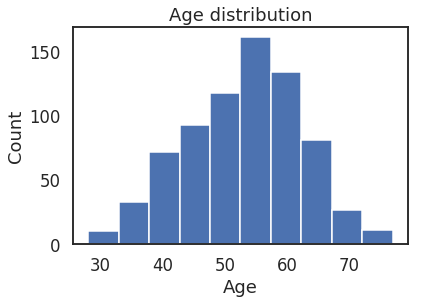

In [4]:
plt.hist(data['age'])
plt.title('Age distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

### Sex distribution

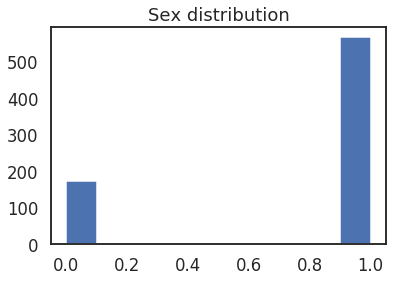

In [5]:
plt.hist(data['sex'])
plt.title('Sex distribution')
plt.show()

## Data relationships

### Relationship between sex and disease

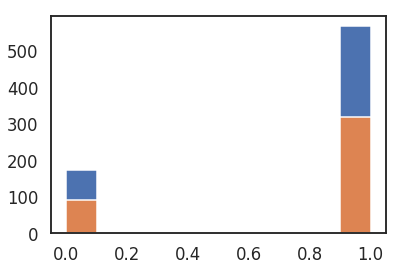

In [6]:
plt.hist(data['sex'])
plt.hist(diseased_patients['sex'])
plt.show()

### Relationship between the age and heart disease

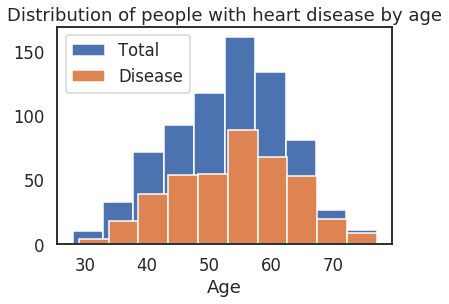

In [7]:
plt.hist(data['age'], label='Total')
plt.hist(diseased_patients['age'], label='Disease')
plt.xlabel('Age')
plt.gca().legend(loc='upper left')
plt.title('Distribution of people with heart disease by age')
plt.show()

### Relationship between disease and cholesterol

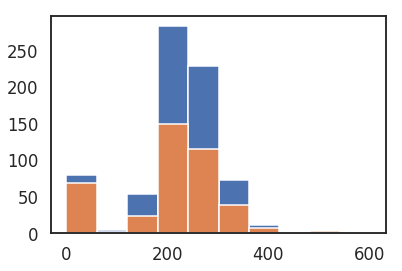

In [8]:
plt.hist(data['chol'])
plt.hist(diseased_patients['chol'])
plt.show()

### Relationship between age and cholesterol

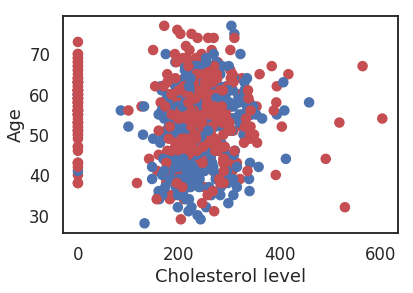

In [9]:
# People with disease will be a red dot and healthy people a blue dot
colors = [('b', 'r')[x] for x in data['target']]
plt.scatter(data['chol'], data['age'], c=colors)
plt.xlabel('Cholesterol level')
plt.ylabel('Age')
plt.show()

### Relationship between blood sugar, cholesterol and heart disease

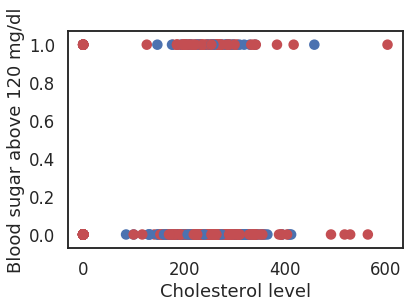

In [10]:
plt.scatter(data['chol'], data['fbs'], c=colors)
plt.xlabel('Cholesterol level')
plt.ylabel('Blood sugar above 120 mg/dl')
plt.show()

Not really good to see anything.

## Let's plot everything against the disease!

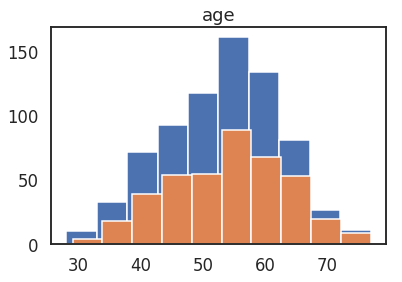

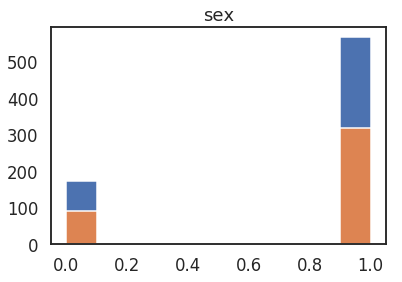

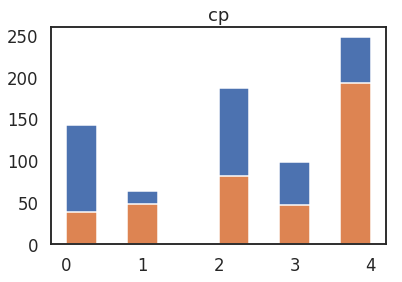

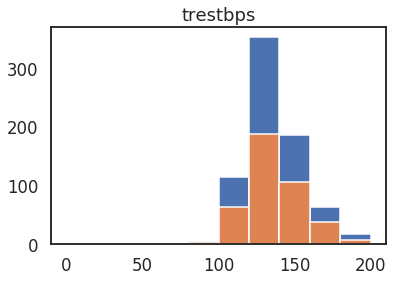

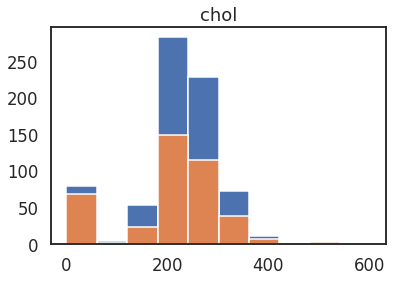

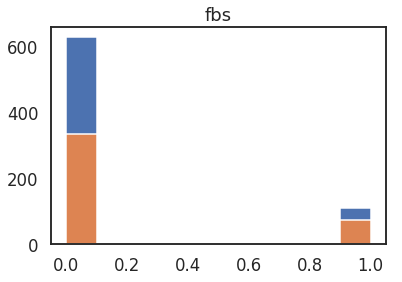

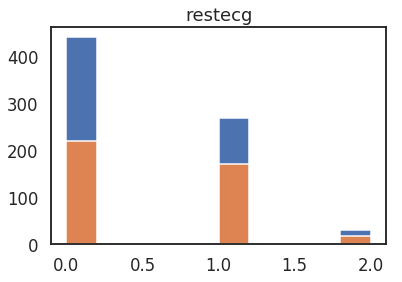

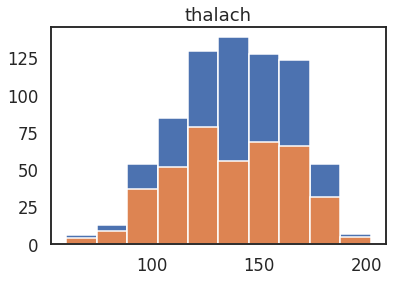

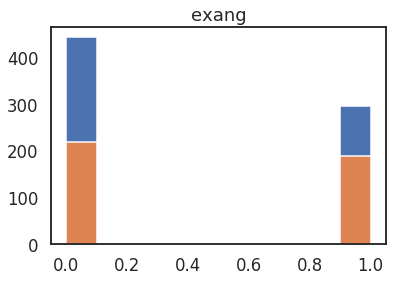

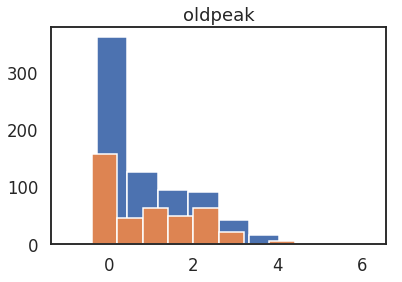

In [11]:
for attr in data.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(data[attr])
    plt.hist(diseased_patients[attr])
    plt.show()

### What if we separate per age groups?
Let's plot everything again but only for people around 55 and 65

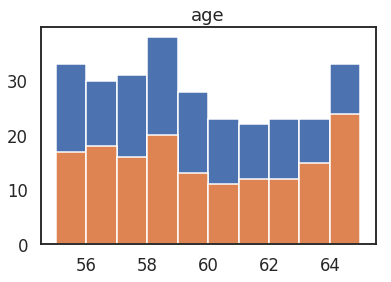

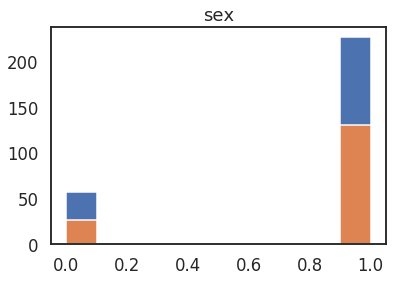

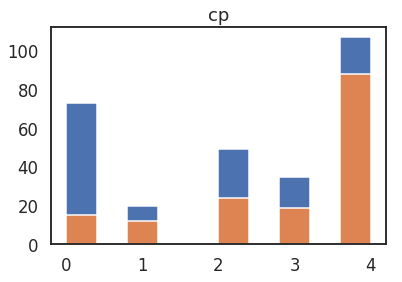

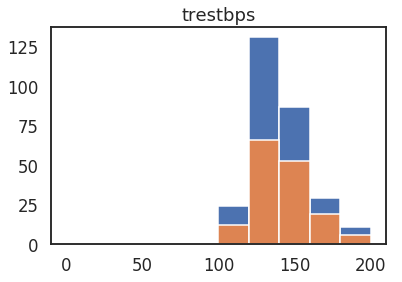

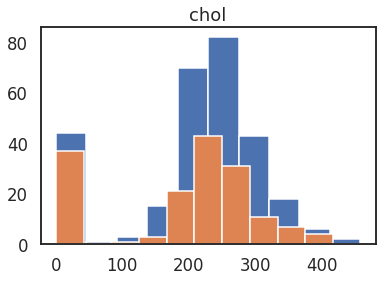

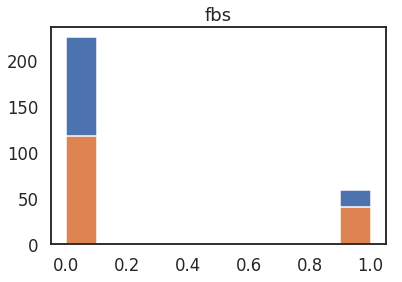

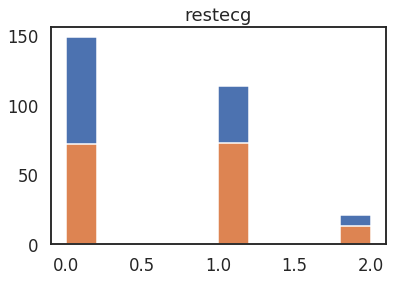

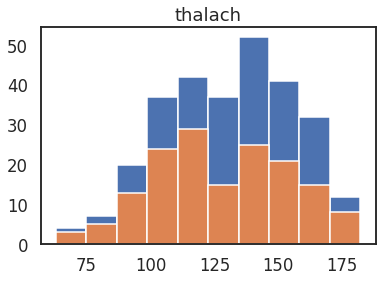

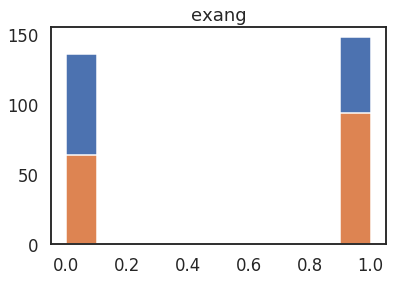

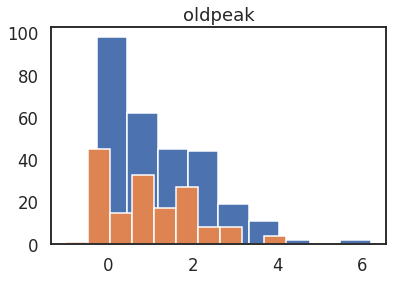

In [12]:
people_age_55_65 = data[data['age'].between(55, 65)]
diseased_patients_55_65 = people_age_55_65[people_age_55_65['target'] == 1]

for attr in people_age_55_65.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(people_age_55_65[attr])
    plt.hist(diseased_patients_55_65[attr])
    plt.show()

We see that a lot of patients whose chest pain is a typical angina do not have a heart disease, so let's see how it works when we remove that portion of patients

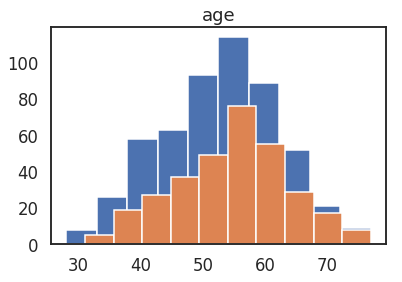

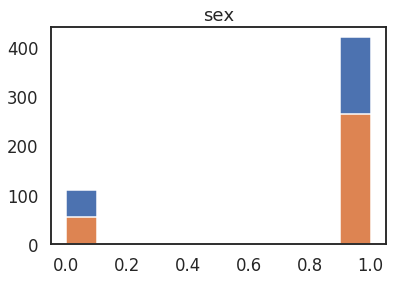

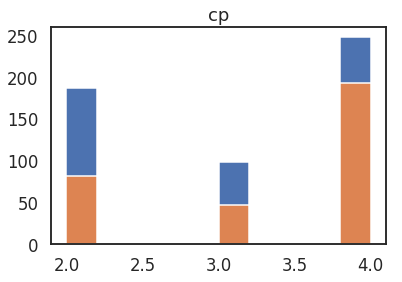

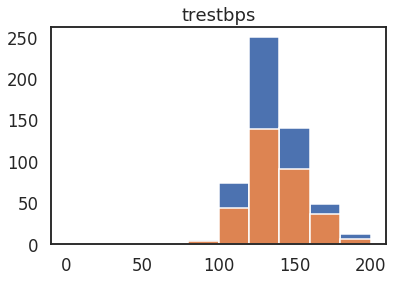

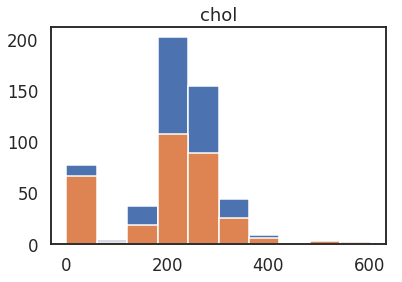

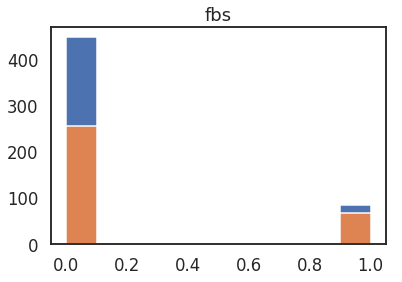

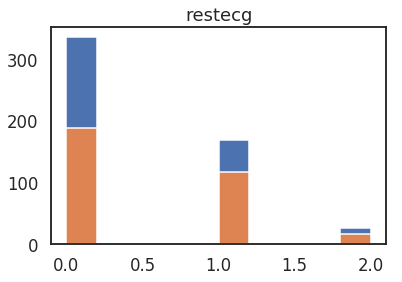

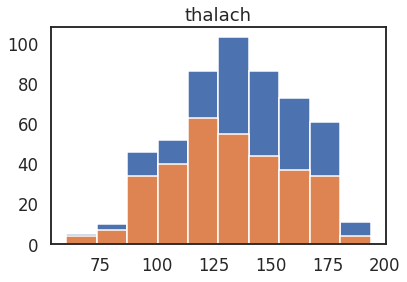

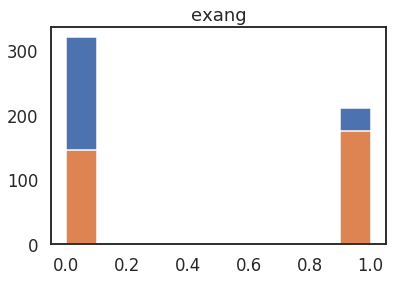

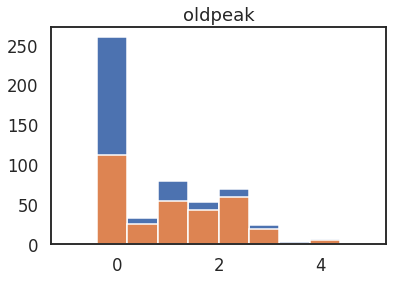

In [13]:
people_cp_gt_1 = data[data['cp'] > 1]
diseased_patients_cp_gt_1 = people_cp_gt_1[people_cp_gt_1['target'] == 1]

for attr in people_cp_gt_1.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(people_cp_gt_1[attr])
    plt.hist(diseased_patients_cp_gt_1[attr])
    plt.show()

WOW! Things start to look a bit more interesting. Let's compare it with people who have chest pain as typical angina and see what do they have that make them have heart disease.

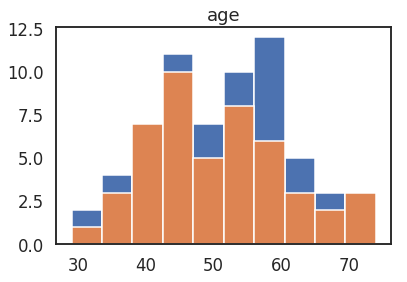

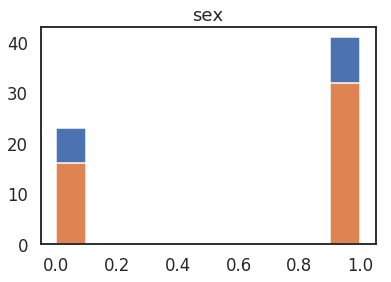

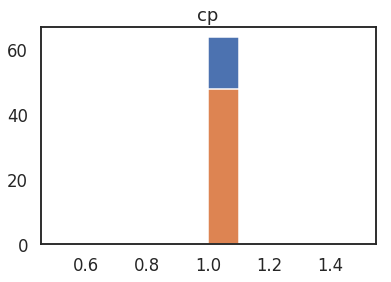

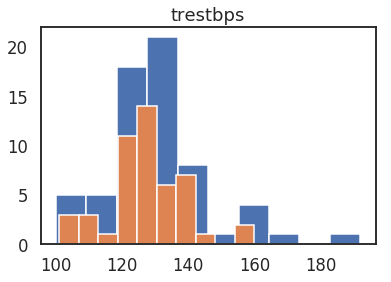

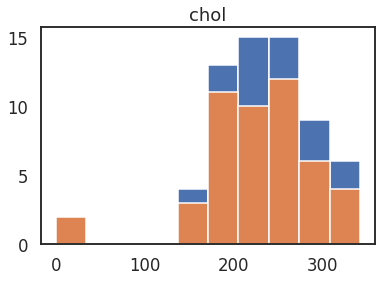

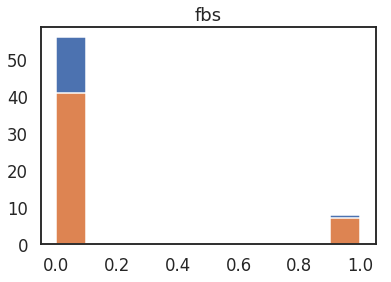

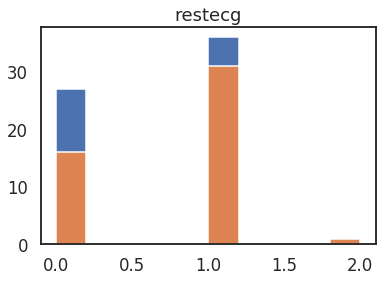

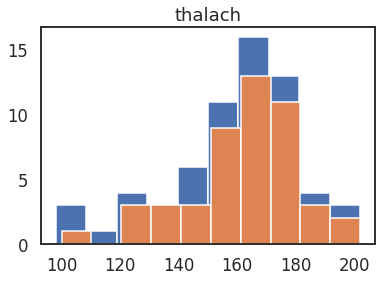

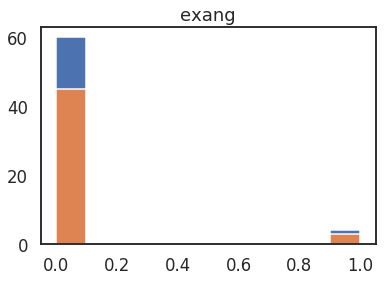

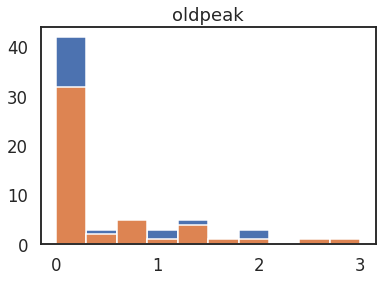

In [14]:
people_cp_eq_1 = data[data['cp'] == 1]
diseased_patients_cp_eq_1 = people_cp_eq_1[people_cp_eq_1['target'] == 1]

for attr in people_cp_eq_1.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(people_cp_eq_1[attr])
    plt.hist(diseased_patients_cp_eq_1[attr])
    plt.show()



## Start doing some classification

We need to understand the data a bit and see how everything works, how good can we detect a heart disease and see what are the most important parameters so that we can focus on them for our visualization

But first, let's split the data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Let's start with a Logistic Regression and see how it performs

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.668918918918919
[[38 28]
 [21 61]]


### Now, let's see how a decision tree works with our data set

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=2460)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.6959459459459459
[[42 24]
 [21 61]]


The decision tree did a bit worse than a logistic regression in average, and false negatives are really dangerous in classifying diseases!

### What about a Random Forest Classifier?

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=64, criterion='gini', random_state=2460)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.7162162162162162
[[42 24]
 [18 64]]


Has less false negatives but still not really accurate.